In [1]:
import requests
import csv
from datetime import datetime, timedelta

url = "http://www.khoa.go.kr/api/oceangrid/tidalBuTemp/search.do"
params = {
    "ServiceKey": "Sfb4fiGk1sy9O8Qfnn4A==",
    "ObsCode": "KG_0028",
    "Date": "",
    "ResultType": "json"
}

start_date = datetime(2013, 1, 1).date()  # Set the starting date
num_days = 3650

# Open the CSV file for writing
with open("data.csv", "w", newline="") as file:
    writer = csv.writer(file)

    for i in range(num_days):
        current_date = start_date + timedelta(days=i)
        current_date_str = current_date.strftime("%Y%m%d")
        params["Date"] = current_date_str

        response = requests.get(url, params=params)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            data = response.json()
            # Process the retrieved JSON data as per your requirements
            # You can access the specific data elements using dictionary keys

            # Example: Write data to CSV file
            writer.writerow([current_date_str, data])  # Customize the columns as needed
        else:
            # Handle the error case
            print(f"Error for {current_date_str}:", response.status_code)

In [59]:
import pandas as pd
import numpy as np

# Define the column names
# column_names = ['Column1', 'Column2']

# Read the CSV file and specify the column names
df = pd.read_csv('data_03.csv', index_col=0, parse_dates=True)
# df= df.set_index(pd.to_datetime(df.1))
# Display the entire DataFrame
df['평균수온'] = df.mean(axis=1)
df = df[['평균수온']]

df.loc[df['평균수온'] == 0, '평균수온'] = np.nan

df = df.dropna()
df

# # Display the first few rows
# print(df.head())


,평균수온
일시,
2013-01-01,15.410204
2013-01-02,15.279167
2013-01-03,15.121739
2013-01-04,15.091667
2013-01-05,15.040816
...,...
2022-12-25,16.727755
2022-12-26,16.173673
2022-12-27,15.887347


In [60]:
monthly_avg_temp = df['평균수온'].resample('M').mean()
monthly_avg_temp

일시
2013-01-31    14.341276
2013-02-28    13.211261
2013-03-31    12.698982
2013-04-30    14.078943
2013-05-31    15.715653
                ...    
2022-08-31    28.614067
2022-09-30    25.115871
2022-10-31    21.456349
2022-11-30    19.880896
2022-12-31    17.485349
Freq: M, Name: 평균수온, Length: 120, dtype: float64

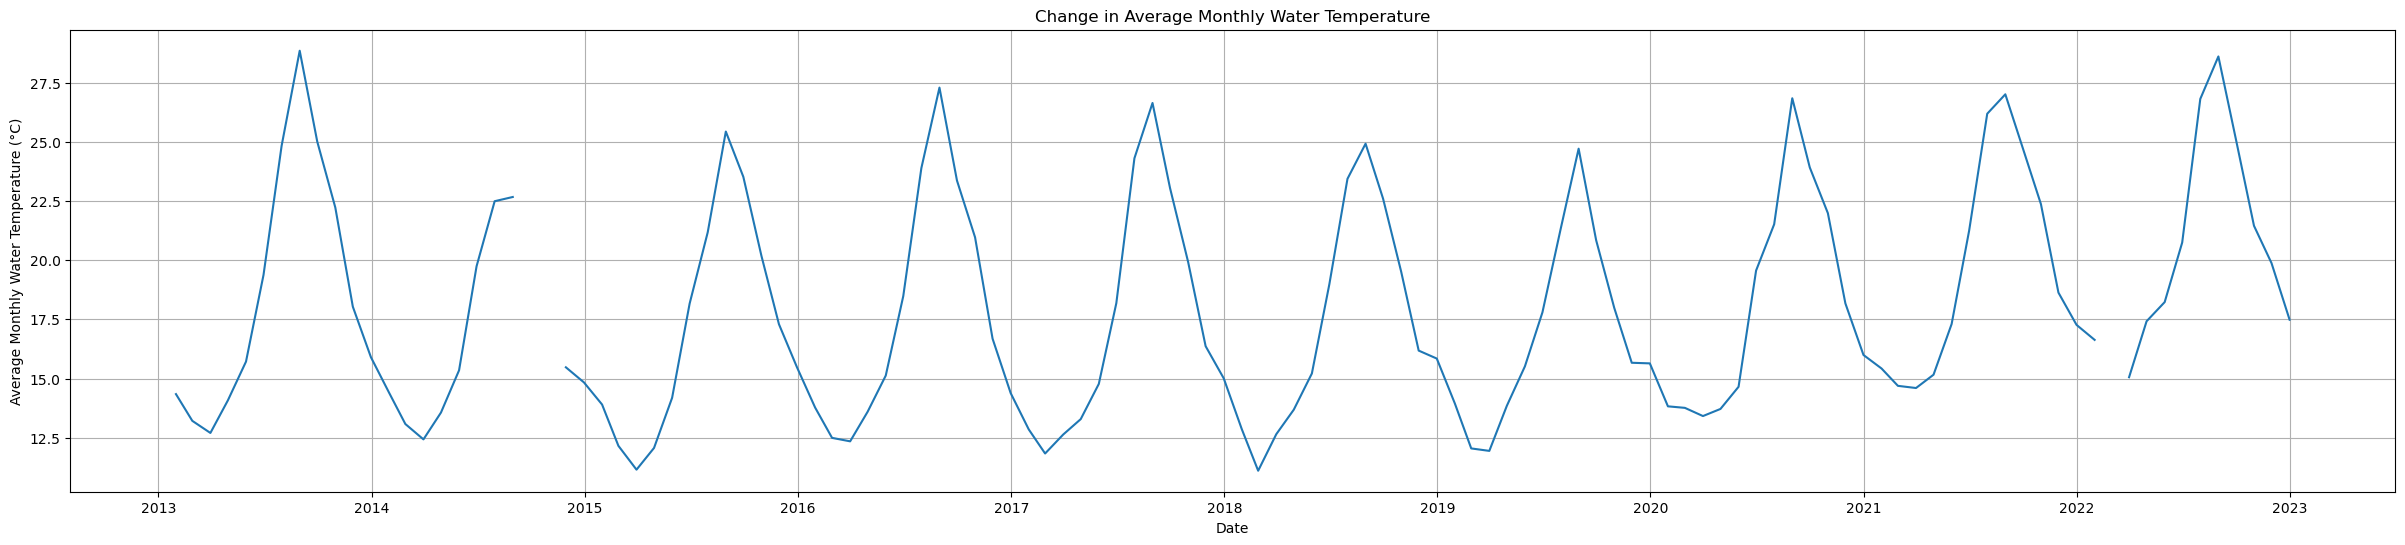

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_temp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Water Temperature (°C)')
plt.title('Change in Average Monthly Water Temperature')
plt.grid(True)
plt.show()

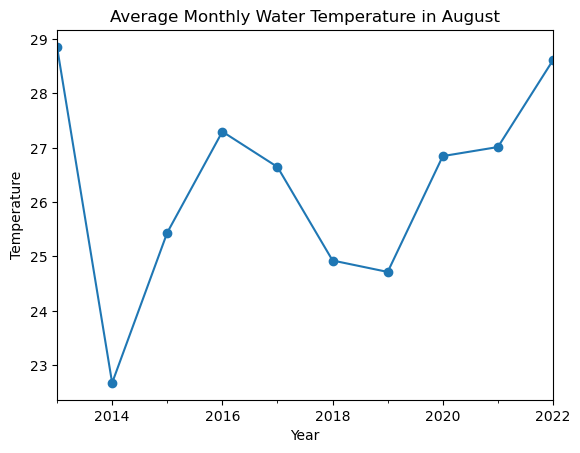

일시
2013-08-31    28.856419
2014-08-31    22.673618
2015-08-31    25.439666
2016-08-31    27.298020
2017-08-31    26.647431
2018-08-31    24.926262
2019-08-31    24.715890
2020-08-31    26.847493
2021-08-31    27.014374
2022-08-31    28.614067
Name: 평균수온, dtype: float64


In [70]:
# Filter the data for August
august_data = monthly_avg_temp[monthly_avg_temp.index.month == 8]

# Plot the average monthly water temperature in August
august_data.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in August')
plt.show()
print(august_data)

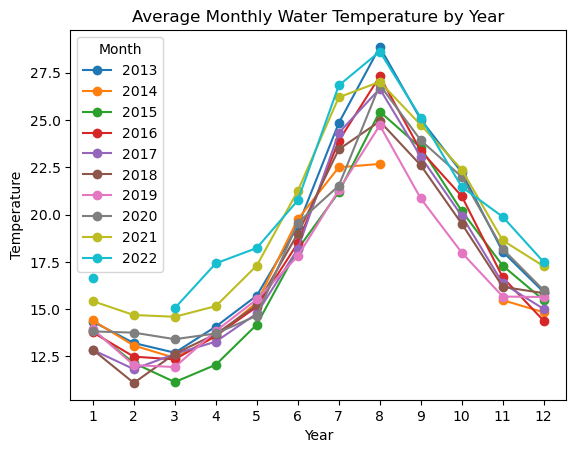

In [100]:
# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['평균수온'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Plot the average monthly water temperature for each month of each year
yearly_monthly_avg.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature by Year')
plt.legend(title='Month')
plt.xticks(yearly_monthly_avg.index)
plt.show()

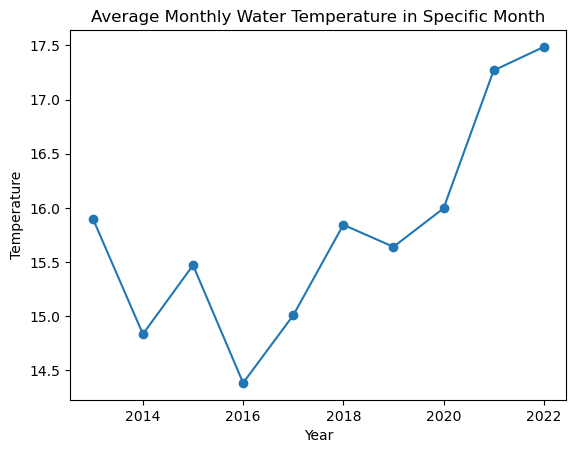

In [101]:

# Define the specific month you want to plot
target_month = 12  # August

# Filter the data for the specific month
specific_month_data = df[df.index.month == target_month]

# Group by year and calculate the average temperature
yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균수온'].mean()

# Plot the average monthly water temperature for the specific month
yearly_avg_specific_month.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Monthly Water Temperature in Specific Month')
plt.show()

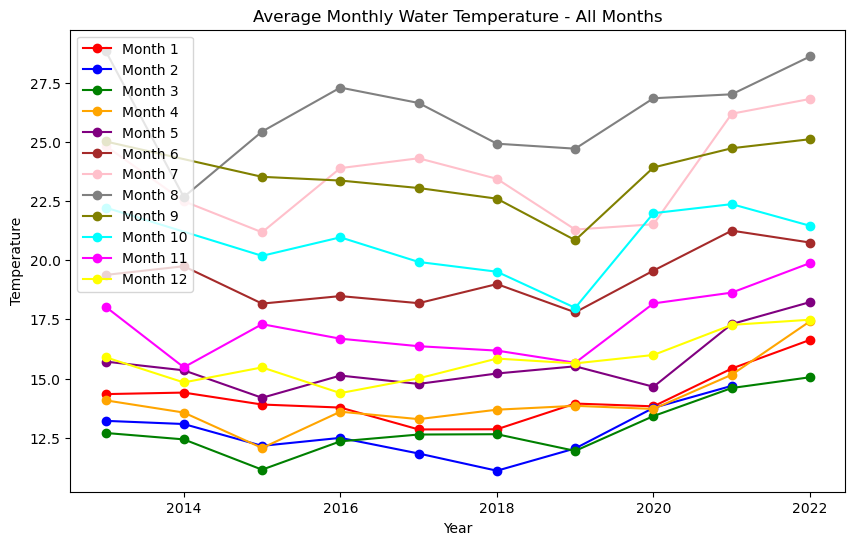

In [102]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균수온'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


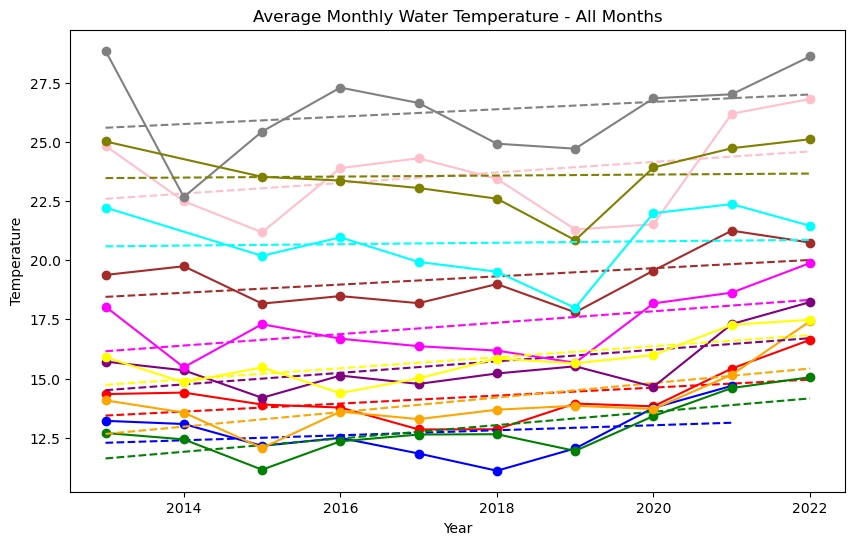

In [95]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균수온'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature - All Months')

# Display the plot
plt.show()


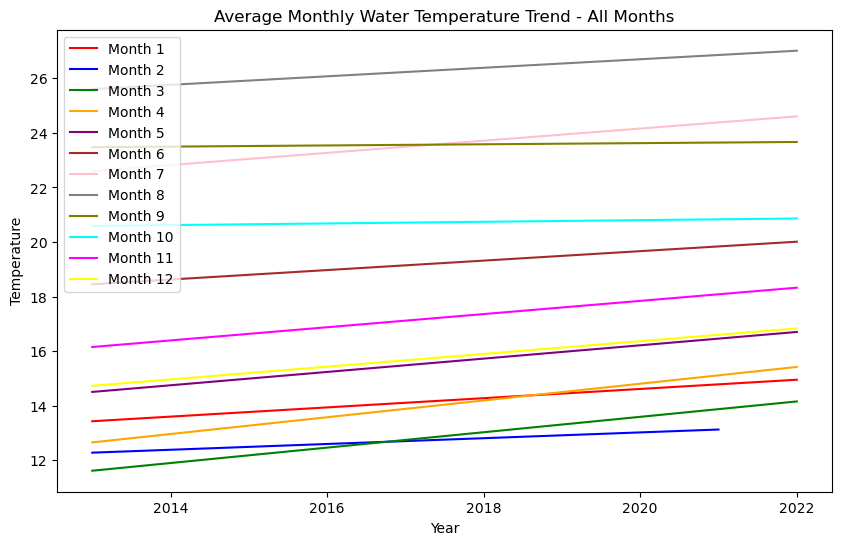

In [105]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균수온'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 4 - Slope: 0.3070481617039449
2. Month 3 - Slope: 0.28196912952817854
3. Month 5 - Slope: 0.24406534618756856
4. Month 11 - Slope: 0.2414601605479823
5. Month 12 - Slope: 0.23343143077944303
6. Month 7 - Slope: 0.2227984654825299
7. Month 6 - Slope: 0.17323191842483004
8. Month 1 - Slope: 0.16896011301939148
9. Month 8 - Slope: 0.15621640057952674
10. Month 2 - Slope: 0.10598511612229115
11. Month 10 - Slope: 0.03021678980027109
12. Month 9 - Slope: 0.021211278516931793


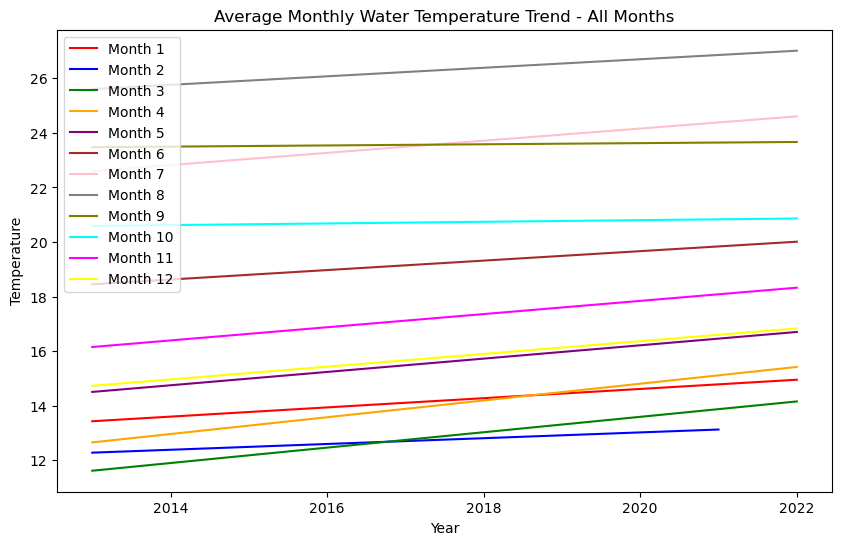

In [109]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['평균수온'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Water Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


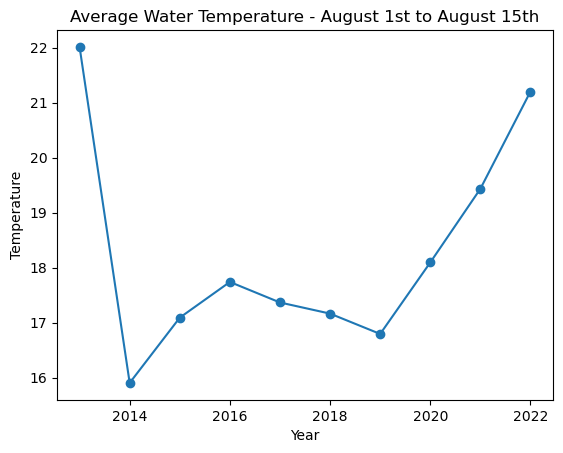

In [103]:

# Define the start and end dates for the range (August 1st to August 15th)
start_date = '2013-08-01'
end_date = '2022-08-15'

# Filter the data for the specified date range
date_range_data = df[(df.index >= start_date) & (df.index <= end_date)]

# Group by year and calculate the average temperature
yearly_avg_temp = date_range_data.groupby(date_range_data.index.year)['평균수온'].mean()

# Plot the average water temperature for the specified date range
yearly_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature - August 1st to August 15th')
plt.show()

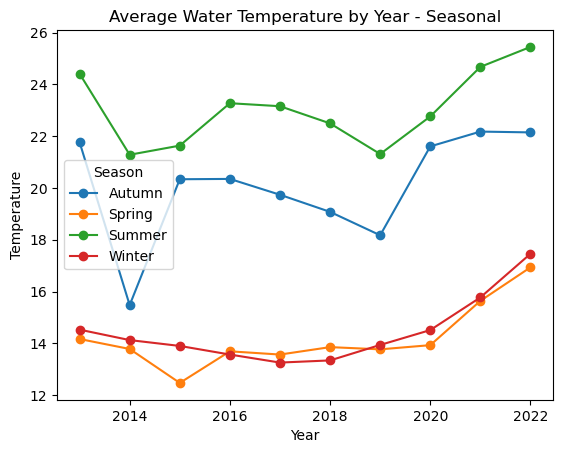

In [104]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['평균수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')
plt.show()

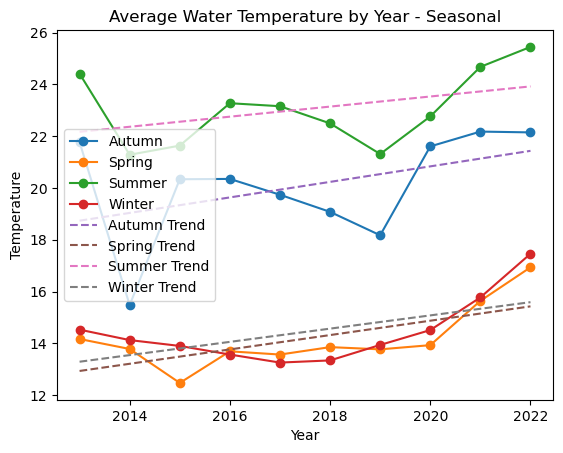

In [106]:

# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['평균수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the average water temperature for each year by season
yearly_seasonal_avg_temp.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature by Year - Seasonal')
plt.legend(title='Season')

# Add trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.legend()
plt.show()


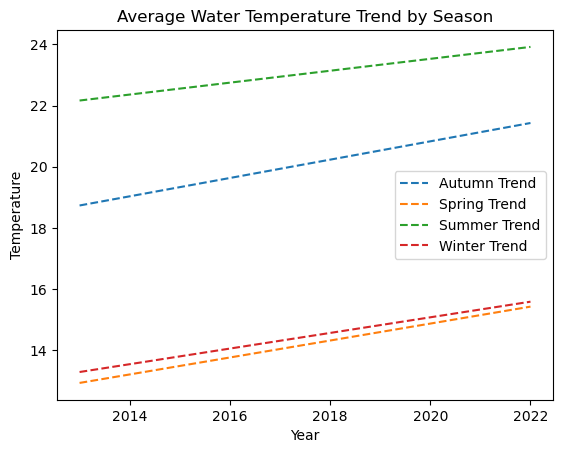

In [107]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['평균수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Plot the trend lines for each season
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()


Order of trends by prominence:
1. Autumn - Slope: 0.299654703387648
2. Spring - Slope: 0.27717154648405373
3. Winter - Slope: 0.2555139848482516
4. Summer - Slope: 0.1947542209155937


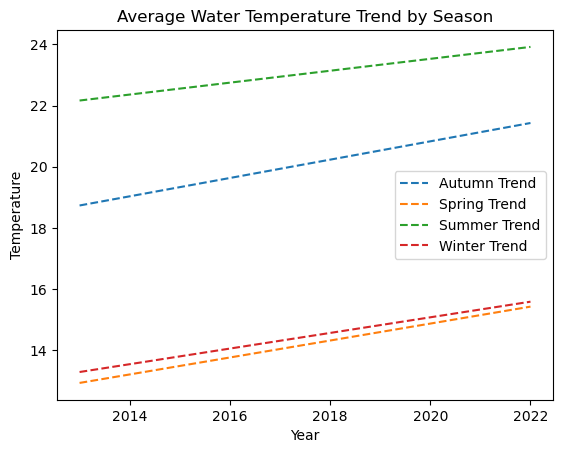

In [108]:
# Create a mapping of months to seasons
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}

# Assign seasons to each month based on the mapping
df['Season'] = df.index.month.map(month_to_season)

# Group by year and season, and calculate the average temperature
yearly_seasonal_avg_temp = df.groupby([df.index.year, 'Season'])['평균수온'].mean()

# Reshape the data to have years as columns and seasons as rows
yearly_seasonal_avg_temp = yearly_seasonal_avg_temp.unstack(level=1)

# Initialize a dictionary to store the slopes
slopes = {}

# Plot the trend lines for each season and calculate the slopes
years = yearly_seasonal_avg_temp.index
seasons = yearly_seasonal_avg_temp.columns
for season in seasons:
    x = np.array(years).reshape(-1, 1)
    y = np.array(yearly_seasonal_avg_temp[season])
    model = LinearRegression()
    model.fit(x, y)
    trend_line = model.predict(x)
    plt.plot(years, trend_line, linestyle='--', label=f'{season} Trend')
    slopes[season] = model.coef_[0]

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (season, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. {season} - Slope: {slope}")

plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Average Water Temperature Trend by Season')
plt.legend()
plt.show()
